In [1]:
import numpy as np
import pandas as pd
import sys
import os
module_path = os.path.abspath(os.path.join(os.path.dirname(os.path.abspath('nbeats.ipynb')),'..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from data import loadData, preprocess, postprocess
from model import fft, lstm
from evaluate import evaluateModel, evaluateProfit
import matplotlib.pyplot as plt

In [2]:
stock_name = "^GSPC"
date_predict_start = '2015-01-01'
window_length = 200
slide_range = 20
total_windows = 10

pv_range = 7
profit_percentage = 0.08
loss_percentage = 0.08

n_harm_lower_limit = 1
n_harm_upper_limit = 50
fit_method = 'rmse'

x_length = 80
y_length = 20
slide = 20

train_data_num = 50
epochs = 50

In [3]:
dataloader = loadData.LoadData(stock_name, window_length, slide_range, total_windows, 6)
train_data, test_data, train_data_index, test_data_index, all_data =\
    dataloader.load_and_split_data(date_predict_start)


c:\Users\e4903\Desktop\code\2023_hw\stock_predict\data\loadData.py:71: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  valid_date = all_data.index.asof(date_predict_start)


In [4]:
# extra_train_data, extra_train_data_index = dataloader.load_extra_train_data(date_predict_start, train_data_num, x_length)
all_data_index = all_data.index
preprocesser = preprocess.Preprocess(x_length, y_length)
x_train, y_train, scaler =\
    preprocesser.preprocess_train_data(train_data)
x_test, y_test, scaler =\
    preprocesser.preprocess_test_data(train_data, test_data, slide=slide)

In [5]:
post = postprocess.Postprocess()
pv_x_train = post.find_data_pv(x_train[:,:,:,0].reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2]), pv_range)
pv_x_train = pv_x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_train = np.concatenate((x_train, pv_x_train), axis=-1)
pv_x_test = post.find_data_pv(x_test[:,:,:,0].reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2]), pv_range)
pv_x_test = pv_x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_test = np.concatenate((x_test, pv_x_test), axis=-1)

In [6]:
shuffle_index = np.random.permutation(x_train.shape[1])
x_train_shuffled = x_train[:, shuffle_index]
y_train_shuffled = y_train[:, shuffle_index]

In [8]:
model = lstm.Lstm()
lstm_processed_signal, history, evaluate = model.lstm(x_train_shuffled, y_train_shuffled, x_test, y_test, test_data, y_length, epochs)

(25, 6)
Epoch 1/50
5/5 [==============================] - 7s 518ms/step - loss: 0.2680 - val_loss: 0.0794
Epoch 2/50
5/5 [==============================] - 1s 137ms/step - loss: 0.1497 - val_loss: 0.0534
Epoch 3/50
5/5 [==============================] - 1s 142ms/step - loss: 0.1138 - val_loss: 0.0394
Epoch 4/50
5/5 [==============================] - 1s 152ms/step - loss: 0.0990 - val_loss: 0.0280
Epoch 5/50
5/5 [==============================] - 1s 145ms/step - loss: 0.0849 - val_loss: 0.0174
Epoch 6/50
5/5 [==============================] - 1s 147ms/step - loss: 0.0796 - val_loss: 0.0299
Epoch 7/50
5/5 [==============================] - 1s 143ms/step - loss: 0.0734 - val_loss: 0.0155
Epoch 8/50
5/5 [==============================] - 1s 140ms/step - loss: 0.0673 - val_loss: 0.0165
Epoch 9/50
5/5 [==============================] - 1s 140ms/step - loss: 0.0647 - val_loss: 0.0172
Epoch 10/50
5/5 [==============================] - 1s 140ms/step - loss: 0.0589 - val_loss: 0.0140
Epoch 11/50

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 [==============================] - 0s 57ms/step - loss: 0.0073


 10%|█         | 1/10 [00:01<00:13,  1.54s/it]

1/1 [==============================] - 0s 50ms/step - loss: 0.0068


 20%|██        | 2/10 [00:01<00:05,  1.34it/s]

1/1 [==============================] - 0s 50ms/step - loss: 0.0300


 30%|███       | 3/10 [00:01<00:03,  2.01it/s]

1/1 [==============================] - 0s 53ms/step - loss: 0.0342


 40%|████      | 4/10 [00:02<00:02,  2.61it/s]

1/1 [==============================] - 0s 62ms/step - loss: 0.0365


 50%|█████     | 5/10 [00:02<00:01,  3.01it/s]

1/1 [==============================] - 0s 52ms/step - loss: 0.0517


 60%|██████    | 6/10 [00:02<00:01,  3.47it/s]

1/1 [==============================] - 0s 53ms/step - loss: 0.0541


 70%|███████   | 7/10 [00:02<00:00,  3.87it/s]

1/1 [==============================] - 0s 42ms/step - loss: 0.0588


 80%|████████  | 8/10 [00:03<00:00,  4.03it/s]

1/1 [==============================] - 0s 52ms/step - loss: 0.0616


 90%|█████████ | 9/10 [00:03<00:00,  4.37it/s]

1/1 [==============================] - 0s 47ms/step - loss: 0.0610


100%|██████████| 10/10 [00:03<00:00,  2.96it/s]


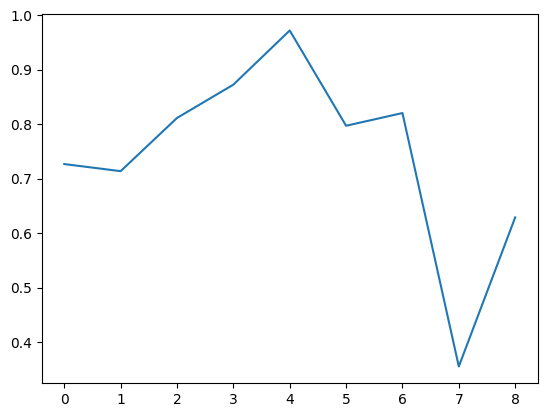

In [9]:
plt.plot(y_test[0,:,0].flatten())

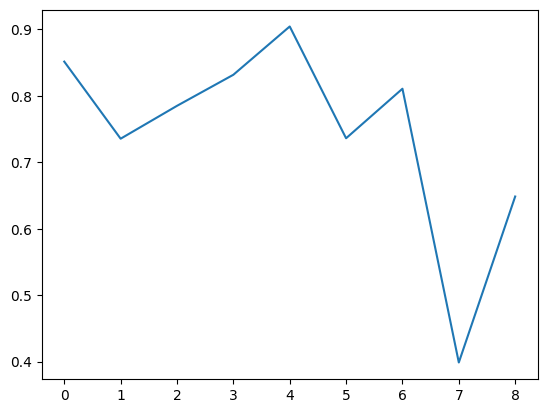

In [10]:
plt.plot(lstm_processed_signal[0,:,0].flatten())

In [11]:
# # initialize N-Beats and fit
# nbeats = NBeatsModel(model_type = 'generic', lookback = x_length, horizon = 1)
# nbeats.fit(x_train[0], y_train[0], epochs = 30)

In [12]:
post = postprocess.Postprocess()
processed_signal = post.postprocess_lstm(lstm_processed_signal, scaler)
pv_train_data = post.find_data_pv(train_data[:,:,0], pv_range)
pv_test_data = post.find_data_pv(test_data[:,:,0], pv_range)
pv_signal = post.find_data_pv(processed_signal, pv_range)
lead_train = post.find_lead(pv_train_data, pv_signal)
lead_test = post.find_lead(pv_test_data, pv_signal)
first_date, lead, pv = post.get_first_lead(pv_signal, lead_test)

In [13]:
# processed_signal, best_fit_harm, best_fit_error = post.postprocess_fft(
#     mixed_train_harm, mixed_test_harm, pv_range, pv_train_data, fit_method)
# pv_signal = post.find_data_pv(processed_signal, pv_range)

In [14]:
lead_train = post.find_lead(pv_train_data, pv_signal)
lead_test = post.find_lead(pv_test_data, pv_signal)
first_date, lead, pv = post.get_first_lead(pv_signal, lead_test)

In [15]:
best_fit_harm = None
best_fit_error = None

In [16]:
evaluater = evaluateModel.Evaluate()
result_table, average_lead = evaluater.evaluate_model(processed_signal, all_data_index, test_data_index, best_fit_harm, best_fit_error, first_date, lead, pv)
print('average_lead = ', average_lead)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(result_table)

average_lead =  5.1


,s_date,t_date,lead,ans_date,pv,best_fit,error
0,2014-12-31,2015-02-05,-4,2015-01-30,valley,NaN,NaN
1,2015-02-06,2015-02-19,7,2015-03-02,peak,NaN,NaN
2,2015-03-16,2015-03-27,-5,2015-03-20,peak,NaN,NaN
3,2015-04-21,2015-05-20,1,2015-05-21,peak,NaN,NaN
4,2015-05-27,2015-05-28,18,2015-06-23,peak,NaN,NaN
5,2015-07-01,2015-07-20,0,2015-07-20,peak,NaN,NaN
6,2015-08-06,2015-08-12,-2,2015-08-10,peak,NaN,NaN
7,2015-09-11,2015-09-15,1,2015-09-16,peak,NaN,NaN
8,2015-10-16,2015-11-05,-2,2015-11-03,peak,NaN,NaN
9,2015-11-20,2015-12-03,11,2015-12-18,valley,NaN,NaN


evaluater = evaluateProfit.EvaluateProfit()

In [17]:
evaluater = evaluateProfit.EvaluateProfit()

total_profit = 212.75048828125


,in_date,in_price,out_date,out_price,pv,profit,profitability
0,2015-02-05,2043.45,2015-02-17,2100.34,valley,56.89,0.0278 %
1,2015-02-19,2099.25,2015-03-02,2117.39,peak,-18.14,-0.0086 %
2,2015-03-27,2055.78,2015-04-08,2081.9,peak,-26.12,-0.0127 %
3,2015-05-20,2127.79,2015-06-01,2111.73,peak,16.06,0.0075 %
4,2015-05-28,2122.27,2015-06-08,2079.28,peak,42.99,0.0203 %
5,2015-07-20,2126.85,2015-07-29,2108.57,peak,18.28,0.0086 %
6,2015-08-12,2081.1,2015-08-21,1970.89,peak,110.21,0.053 %
7,2015-09-15,1955.1,2015-09-24,1932.24,peak,22.86,0.0117 %
8,2015-11-05,2101.68,2015-11-16,2053.19,peak,48.49,0.0231 %
9,2015-12-03,2080.71,2015-12-14,2021.94,valley,-58.77,-0.0282 %


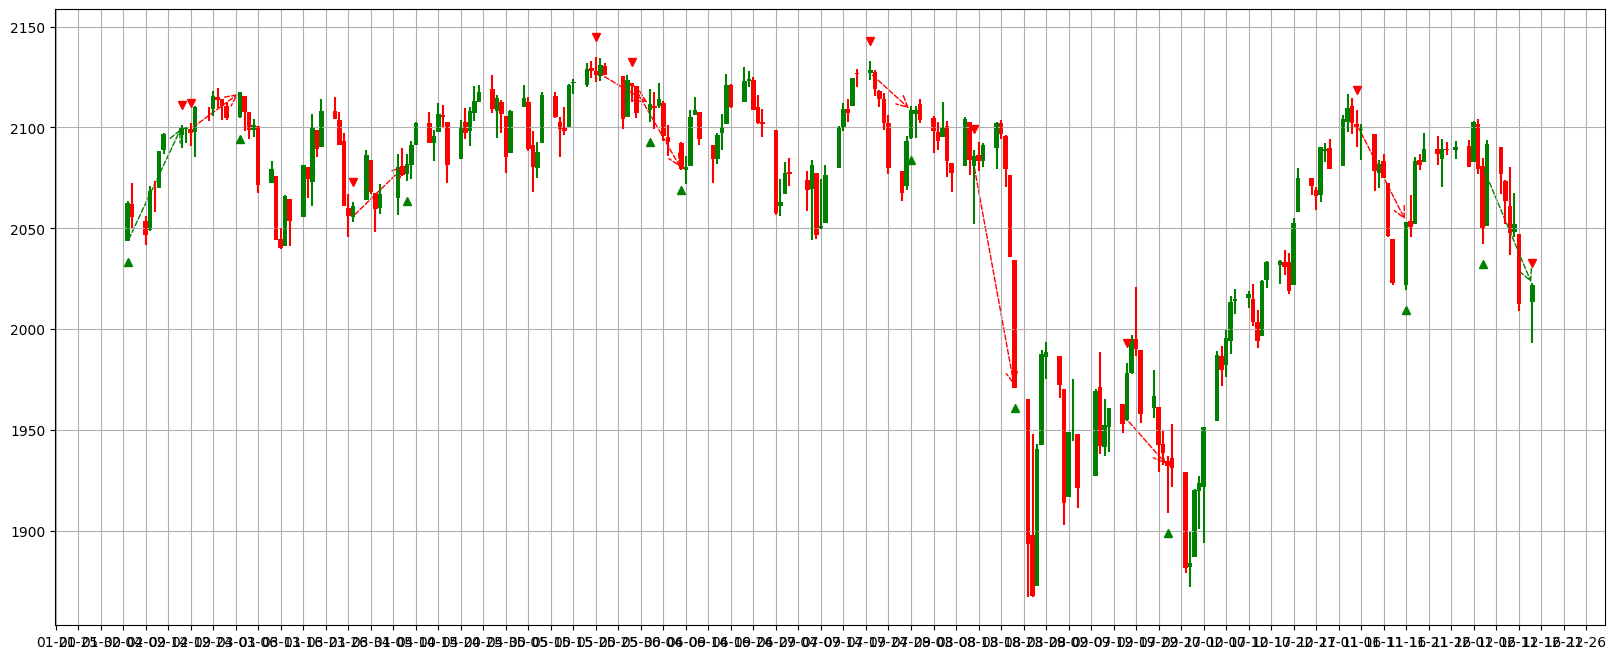

In [18]:
total_profit, profit_table = evaluater.build_profit_table_strategy_1(result_table, all_data, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)
evaluater.draw_profit_plot(profit_table, all_data)

total_profit = 212.75048828125


,in_date,in_price,out_date,out_price,pv,profit,strategy,strategy_price,profitability
0,2015-02-05,2043.45,2015-02-17,2100.34,valley,56.89,NaN,NaN,0.0278 %
1,2015-02-19,2099.25,2015-03-02,2117.39,peak,-18.14,NaN,NaN,-0.0086 %
2,2015-03-27,2055.78,2015-04-08,2081.9,peak,-26.12,NaN,NaN,-0.0127 %
3,2015-05-20,2127.79,2015-06-01,2111.73,peak,16.06,NaN,NaN,0.0075 %
4,2015-05-28,2122.27,2015-06-08,2079.28,peak,42.99,NaN,NaN,0.0203 %
5,2015-07-20,2126.85,2015-07-29,2108.57,peak,18.28,NaN,NaN,0.0086 %
6,2015-08-12,2081.1,2015-08-21,1970.89,peak,110.21,NaN,NaN,0.053 %
7,2015-09-15,1955.1,2015-09-24,1932.24,peak,22.86,NaN,NaN,0.0117 %
8,2015-11-05,2101.68,2015-11-16,2053.19,peak,48.49,NaN,NaN,0.0231 %
9,2015-12-03,2080.71,2015-12-14,2021.94,valley,-58.77,NaN,NaN,-0.0282 %


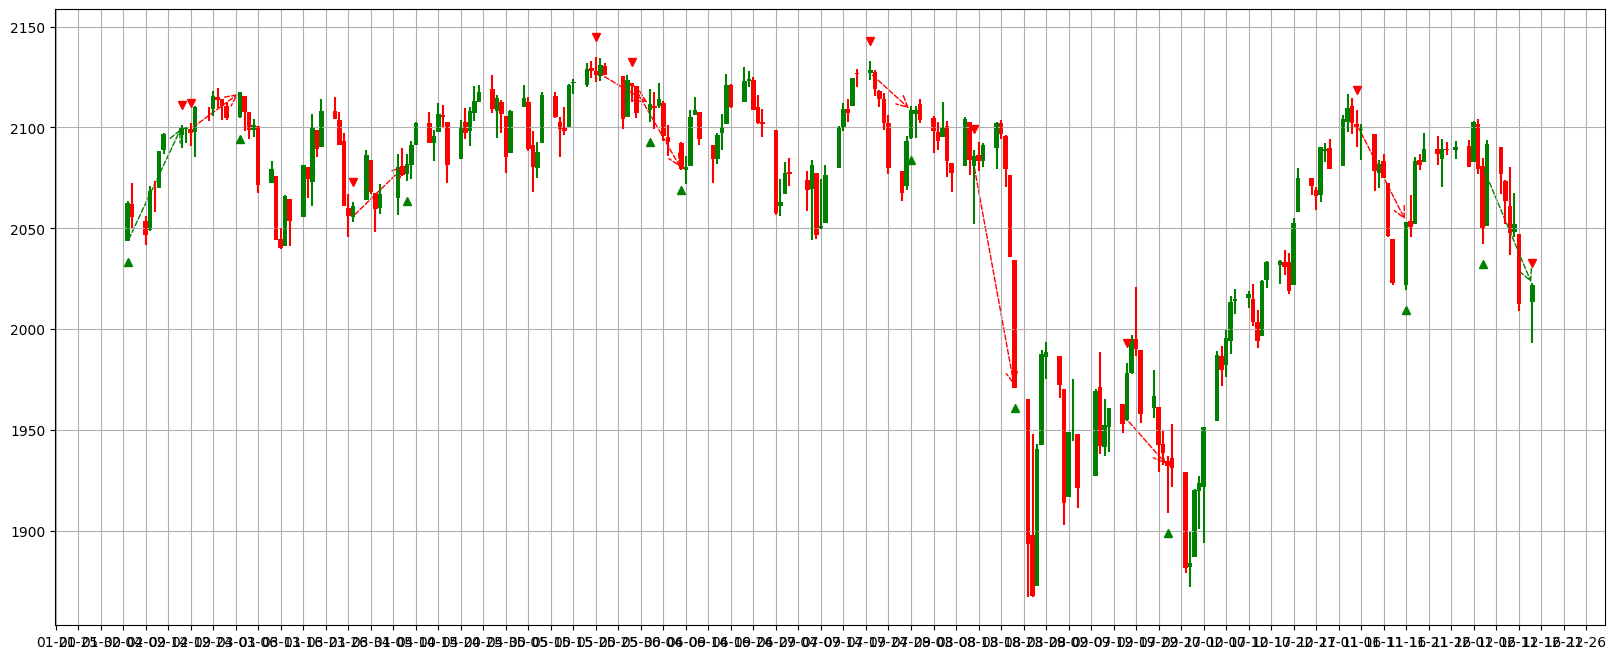

In [19]:
total_profit, profit_table = evaluater.build_profit_table_strategy_2(result_table, all_data, profit_percentage, loss_percentage, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)
evaluater.draw_profit_plot(profit_table, all_data)

total_profit = 212.75048828125


,in_date,in_price,out_date,out_price,pv,profit,strategy,strategy_price,profitability
0,2015-02-05,2043.45,2015-02-17,2100.34,valley,56.89,NaN,NaN,0.0278 %
1,2015-02-19,2099.25,2015-03-02,2117.39,peak,-18.14,NaN,NaN,-0.0086 %
2,2015-03-27,2055.78,2015-04-08,2081.9,peak,-26.12,NaN,NaN,-0.0127 %
3,2015-05-20,2127.79,2015-06-01,2111.73,peak,16.06,NaN,NaN,0.0075 %
4,2015-05-28,2122.27,2015-06-08,2079.28,peak,42.99,NaN,NaN,0.0203 %
5,2015-07-20,2126.85,2015-07-29,2108.57,peak,18.28,NaN,NaN,0.0086 %
6,2015-08-12,2081.1,2015-08-21,1970.89,peak,110.21,NaN,NaN,0.053 %
7,2015-09-15,1955.1,2015-09-24,1932.24,peak,22.86,NaN,NaN,0.0117 %
8,2015-11-05,2101.68,2015-11-16,2053.19,peak,48.49,NaN,NaN,0.0231 %
9,2015-12-03,2080.71,2015-12-14,2021.94,valley,-58.77,NaN,NaN,-0.0282 %


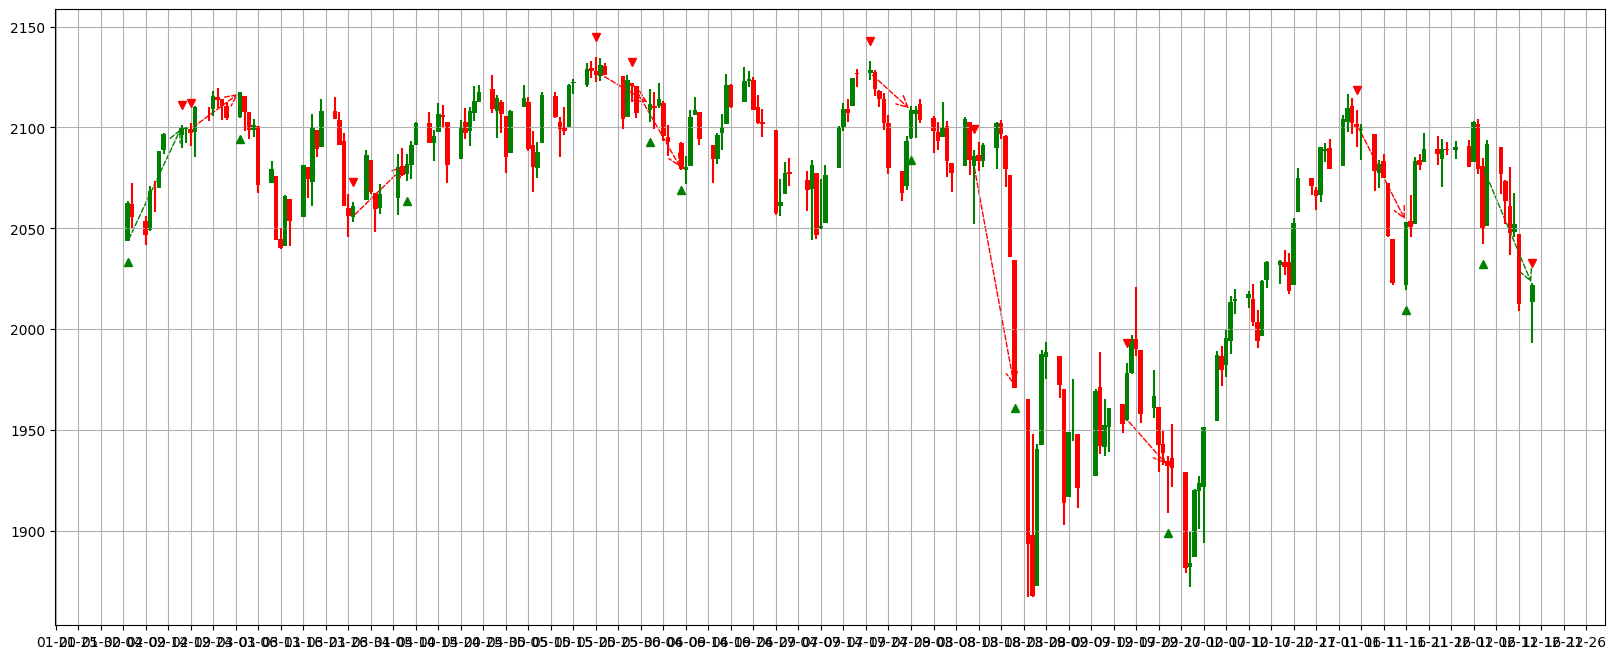

In [20]:
total_profit, profit_table = evaluater.build_profit_table_strategy_3(result_table, all_data, profit_percentage, loss_percentage, pv_range)
print('total_profit =', total_profit)
with pd.option_context('display.max_rows', None,
                    'display.max_columns', None,
                    'display.precision', 3,
                    ):
    display(profit_table)
evaluater.draw_profit_plot(profit_table, all_data)

In [21]:
# fig, ax = plt.subplots(2, 1, figsize=(20, 8), sharex=True)
# ax[0].plot(y_test[0].flatten(), label='y_test')
# ax[1].plot(lstm_processed_signal[0].flatten(), label='signal')
# # for x , pv in enumerate(pv_test_data[0]):
# #     if pv == 1:
# #         ax[0].plot(x, y_test[0].flatten()[x], '^', color='orange')
# #     elif pv == -1:
# #         ax[0].plot(x, y_test[0].flatten()[x], 'v', color='red')
# # for x , pv in enumerate(pv_signal[0]):
# #     if pv == 1:
# #         ax[1].plot(x, lstm_processed_signal[0].flatten()[x], '^', color='orange')
# #     elif pv == -1:
# #         ax[1].plot(x, lstm_processed_signal[0].flatten()[x], 'v', color='red')
# ax[0].legend()
# ax[1].legend()
# plt.show()

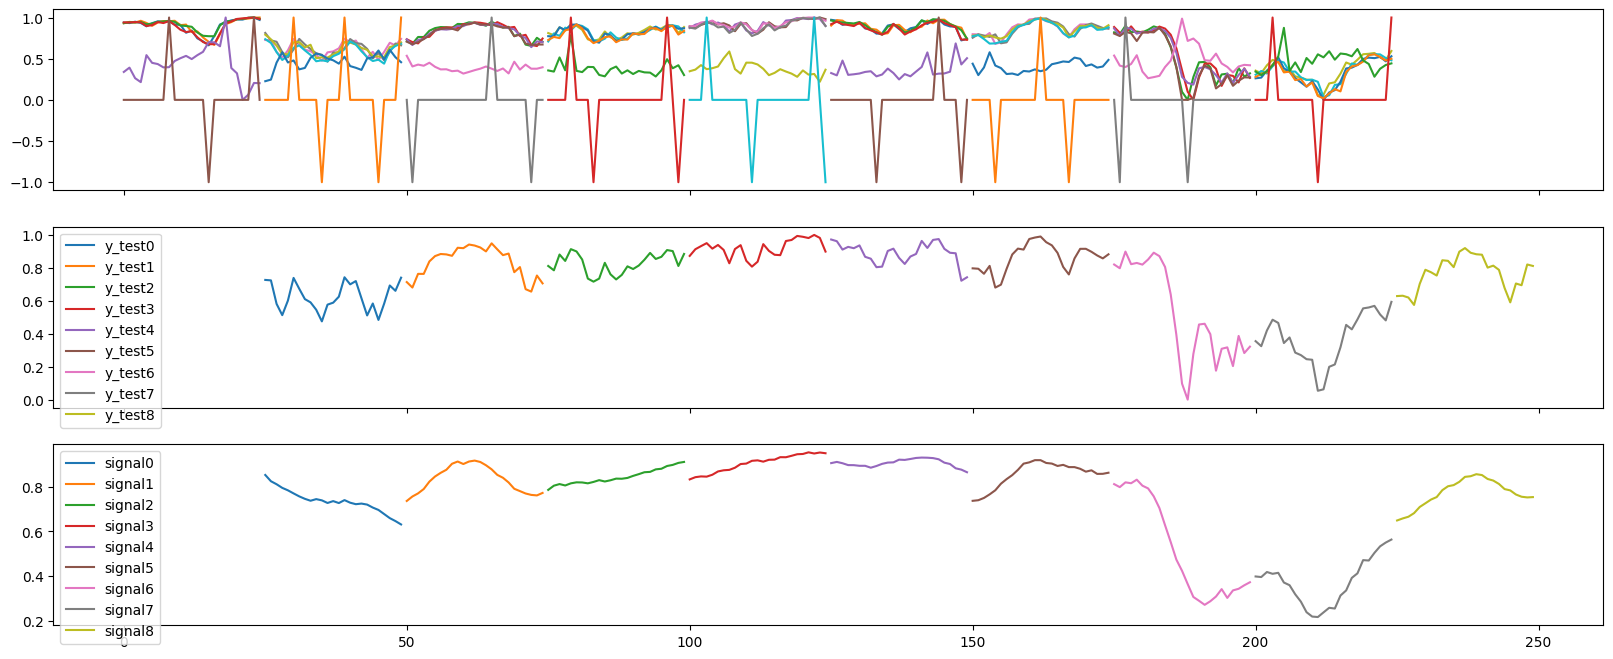

In [22]:
fig, ax = plt.subplots(3, 1, figsize=(20, 8), sharex=True)
count=0
for i in range(0, x_test.shape[1]): 
    # print(i)
    countx=range(count, count+x_length)
    county=range(count+x_length, count+x_length+y_length)
    ax[0].plot(countx, x_test[0, i, :], label=f'x_test{i}')
    ax[1].plot(county, y_test[0, i], label=f'y_test{i}')
    ax[2].plot(county, lstm_processed_signal[0, i], label=f'signal{i}')
    count+=slide
# for x , pv in enumerate(pv_test_data[0]):
#     if pv == 1:
#         ax[1].plot(x, y_test[0].flatten()[x], '^', color='orange')
#     elif pv == -1:
#         ax[1].plot(x, y_test[0].flatten()[x], 'v', color='red')
# for x , pv in enumerate(pv_signal[1]):
#     if pv == 1:
#         ax[2].plot(x, lstm_processed_signal[0].flatten()[x], '^', color='orange')
#     elif pv == -1:
#         ax[2].plot(x, lstm_processed_signal[0].flatten()[x], 'v', color='red')
# ax[0].legend()
ax[1].legend()
ax[2].legend()
plt.show()

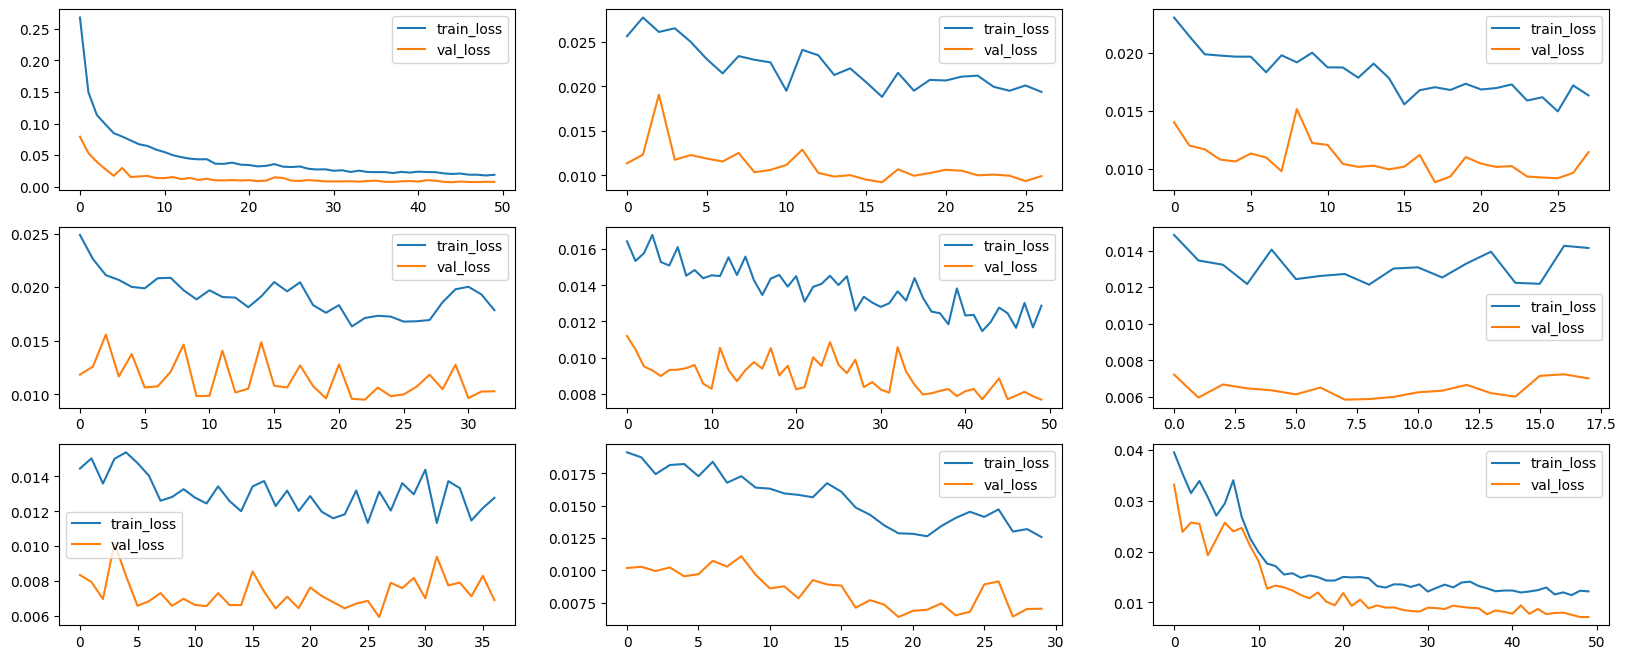

In [23]:
fig, ax = plt.subplots(3, 3, figsize=(20, 8))
i=0
for window in range(9):
    # visualizing losses and accuracy
    train_loss = history[window].history['loss']
    val_loss   = history[window].history['val_loss']
    # plt.title(f'window{window}')
    ax[i//3, i%3].plot(train_loss, label='train_loss')
    ax[i//3, i%3].plot(val_loss, label='val_loss')
    ax[i//3, i%3].legend()
    i+=1
plt.show()


In [24]:
def compute_rmse(predict_value, actual_value):
    absolute_error = np.abs(predict_value - actual_value)
    rmse = np.sqrt(np.mean(absolute_error**2))
    return rmse

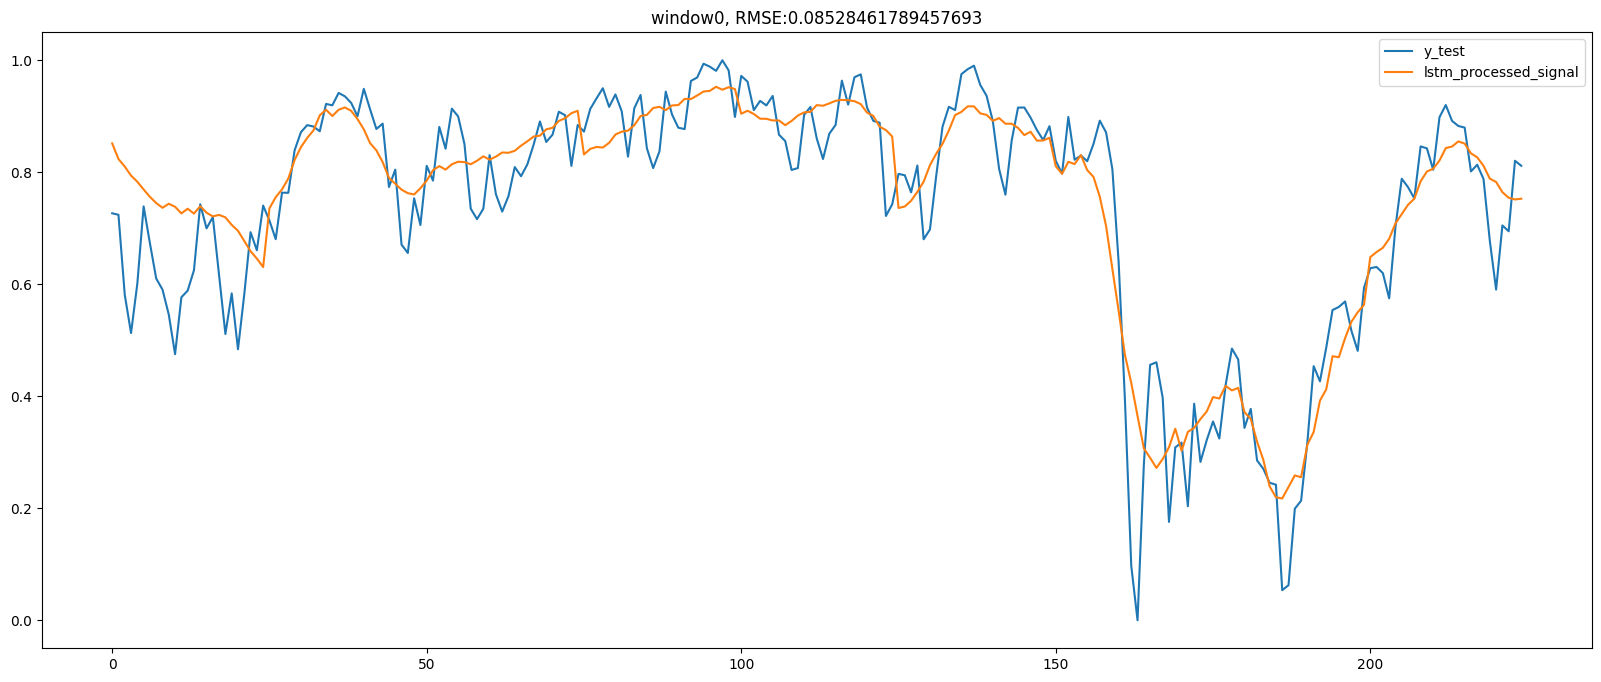

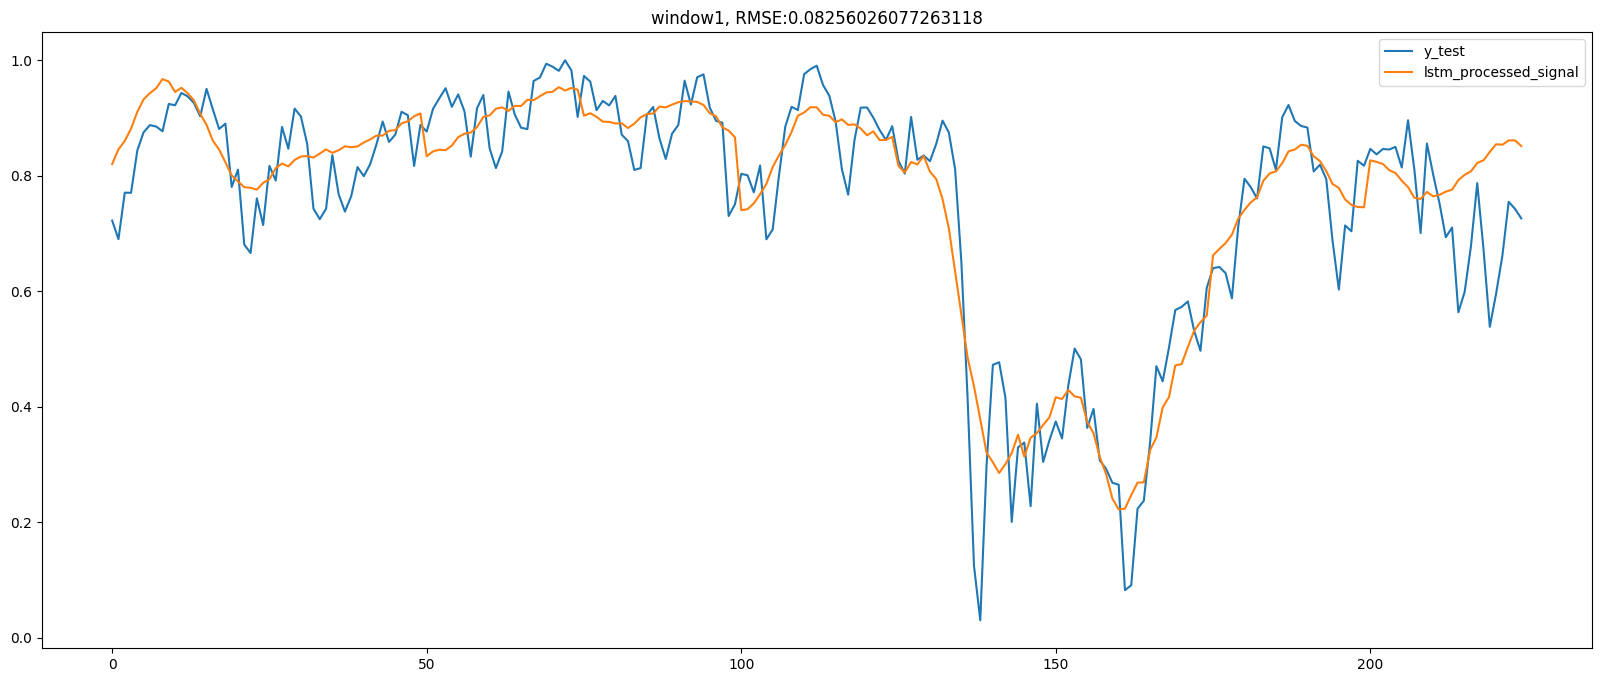

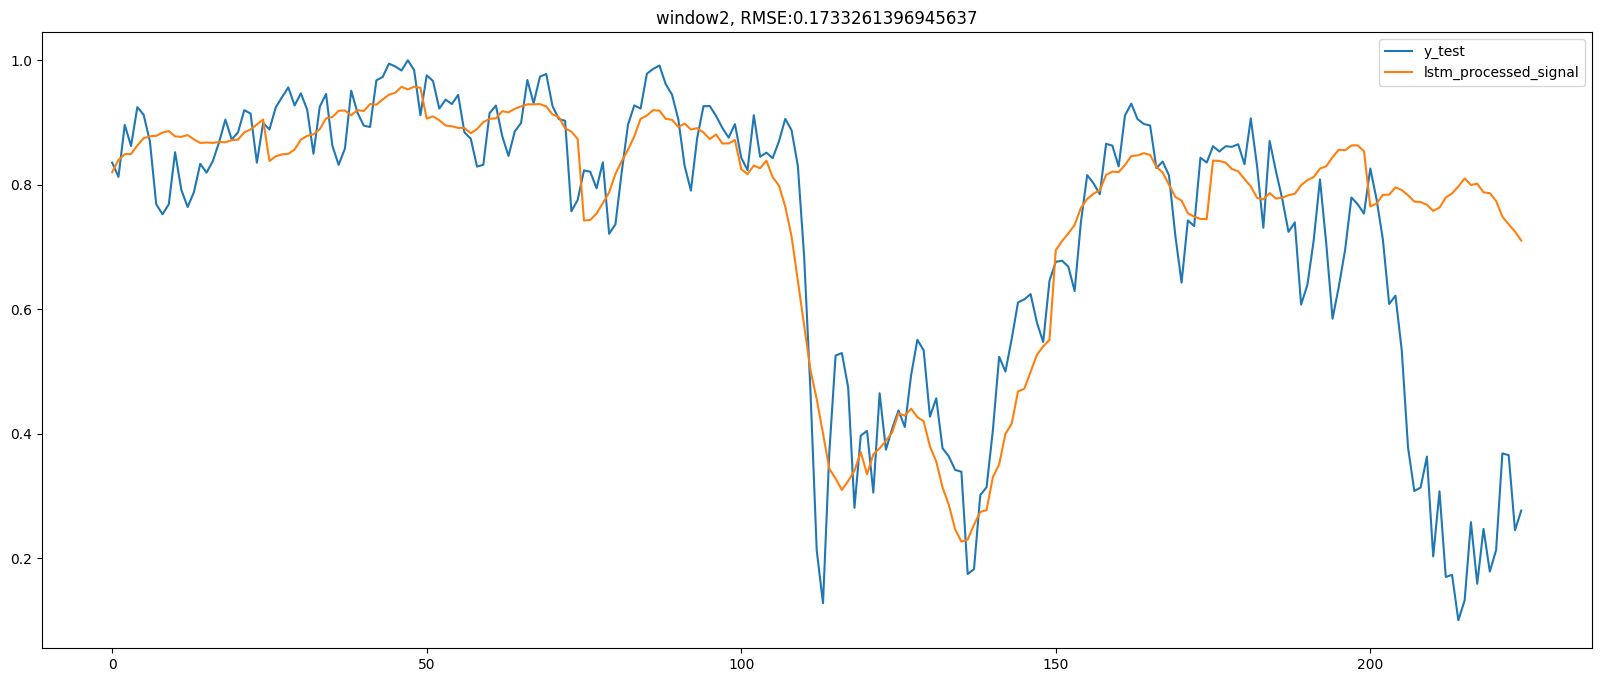

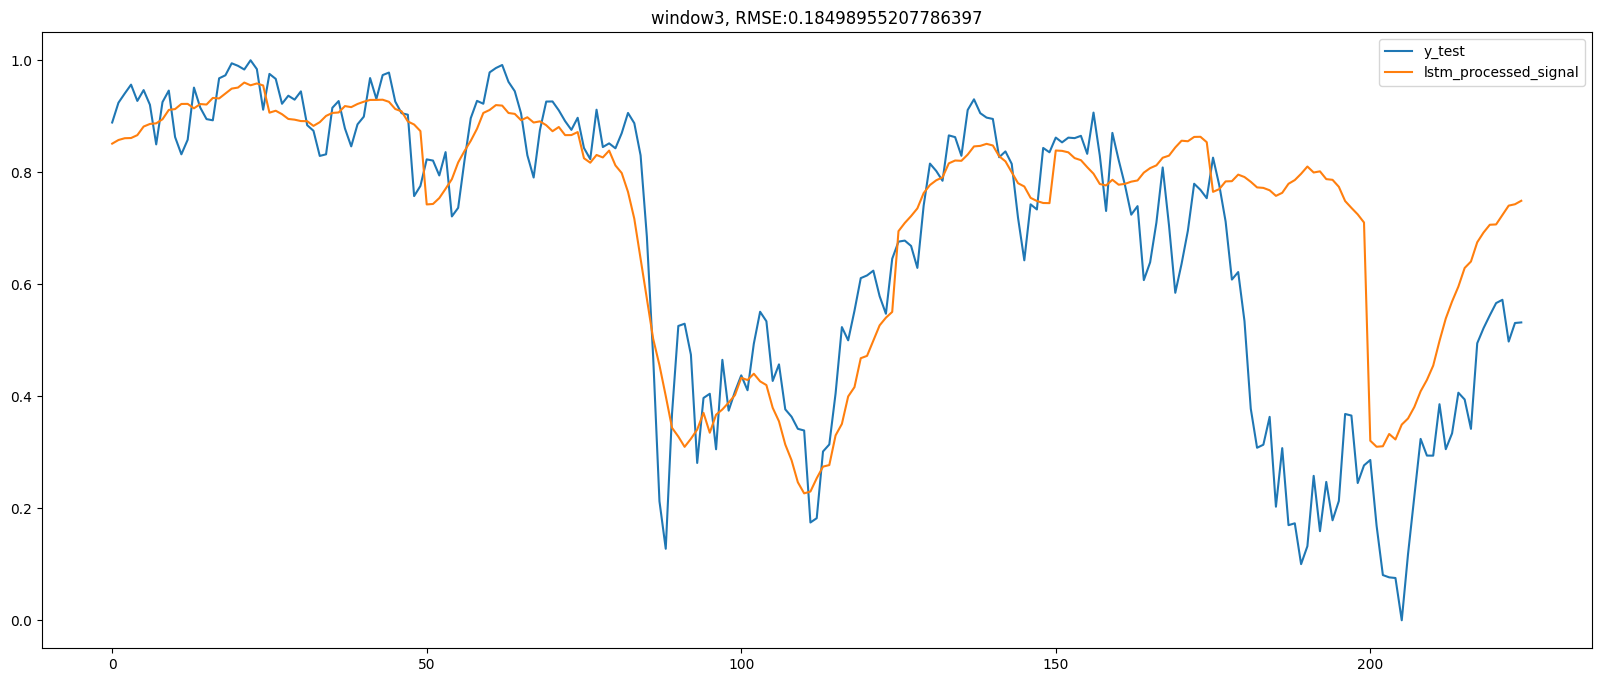

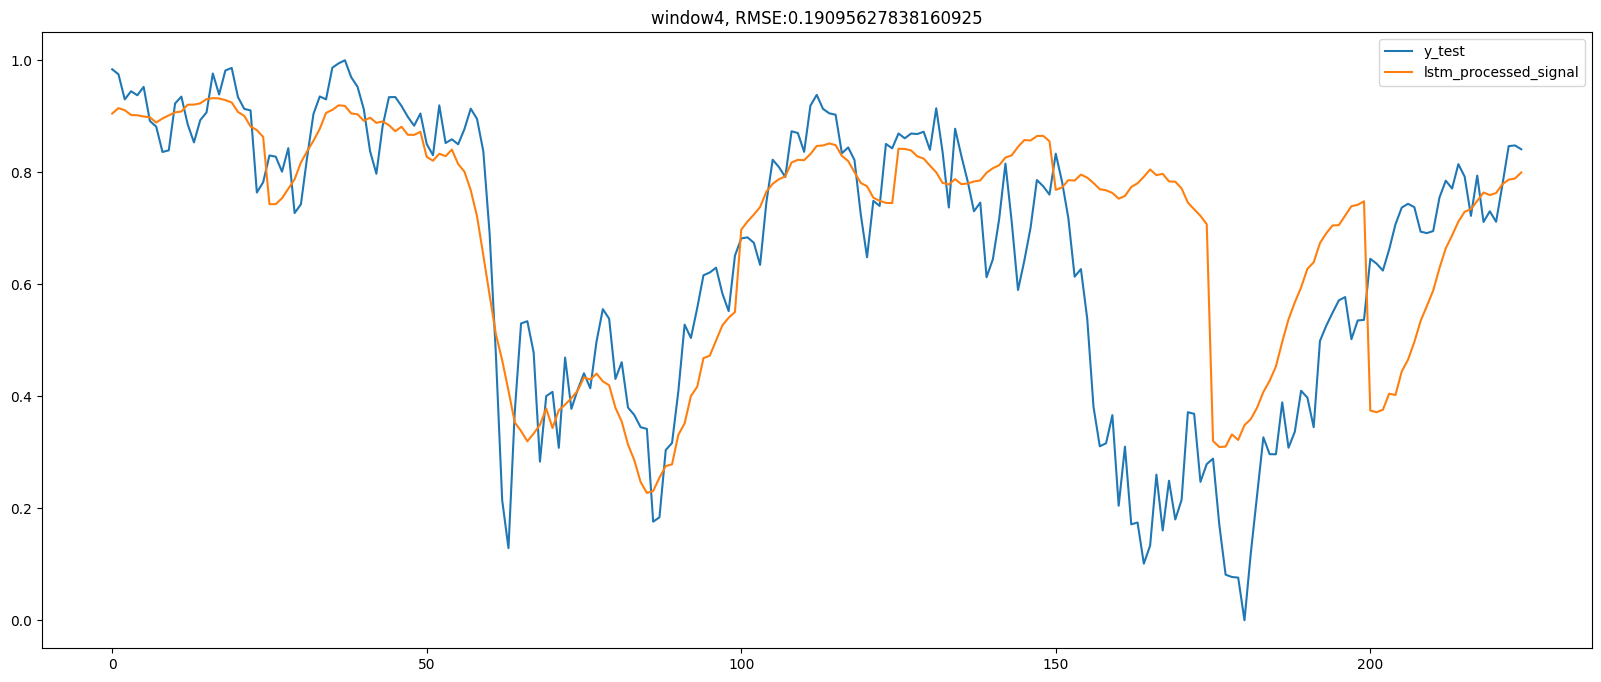

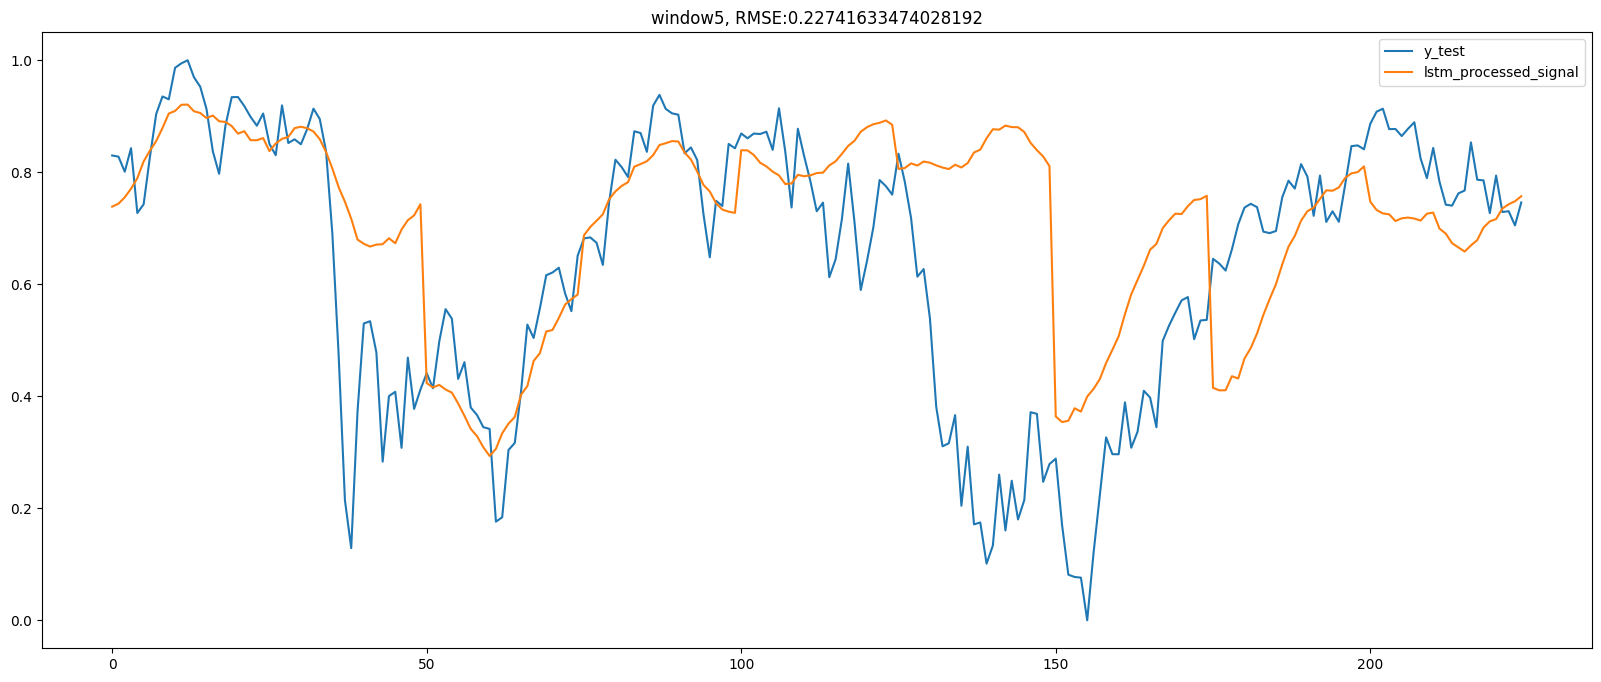

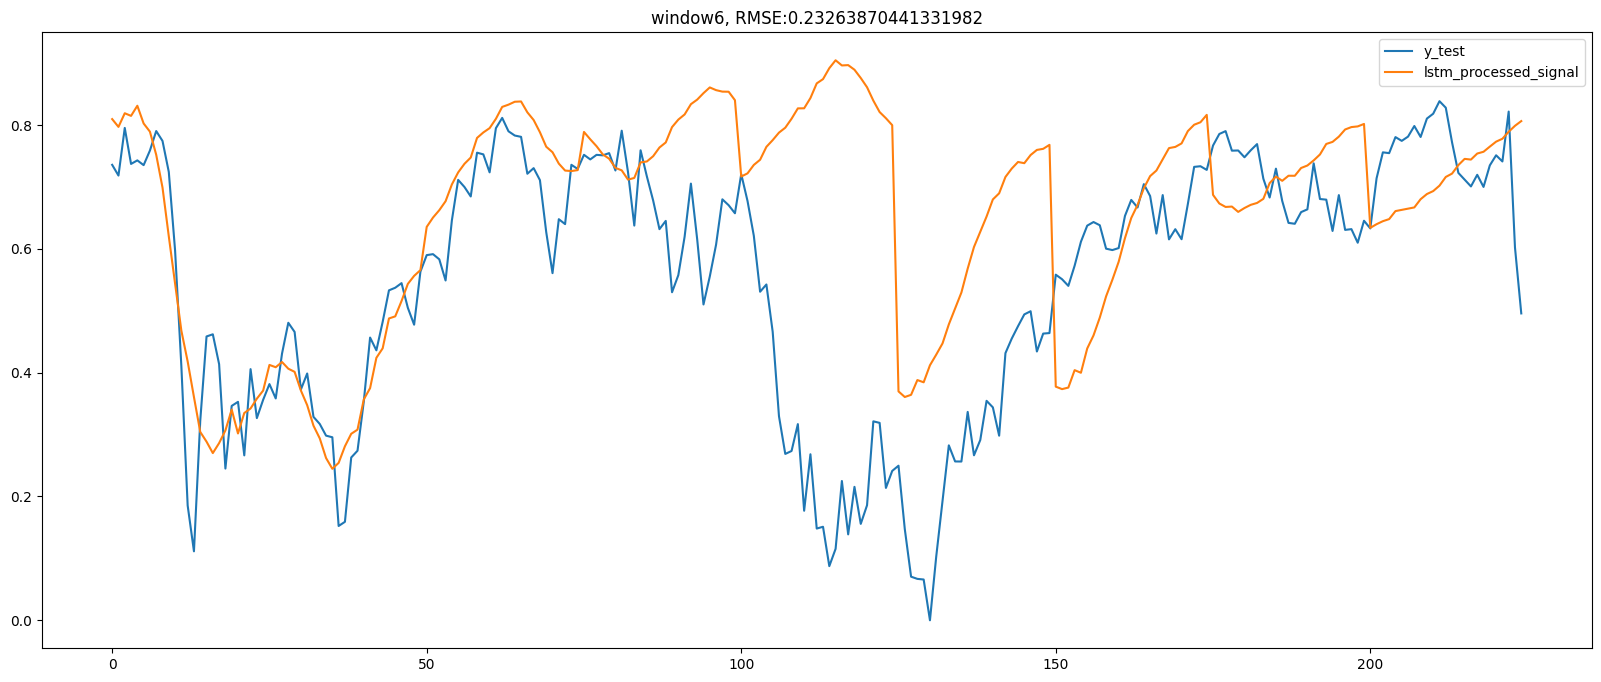

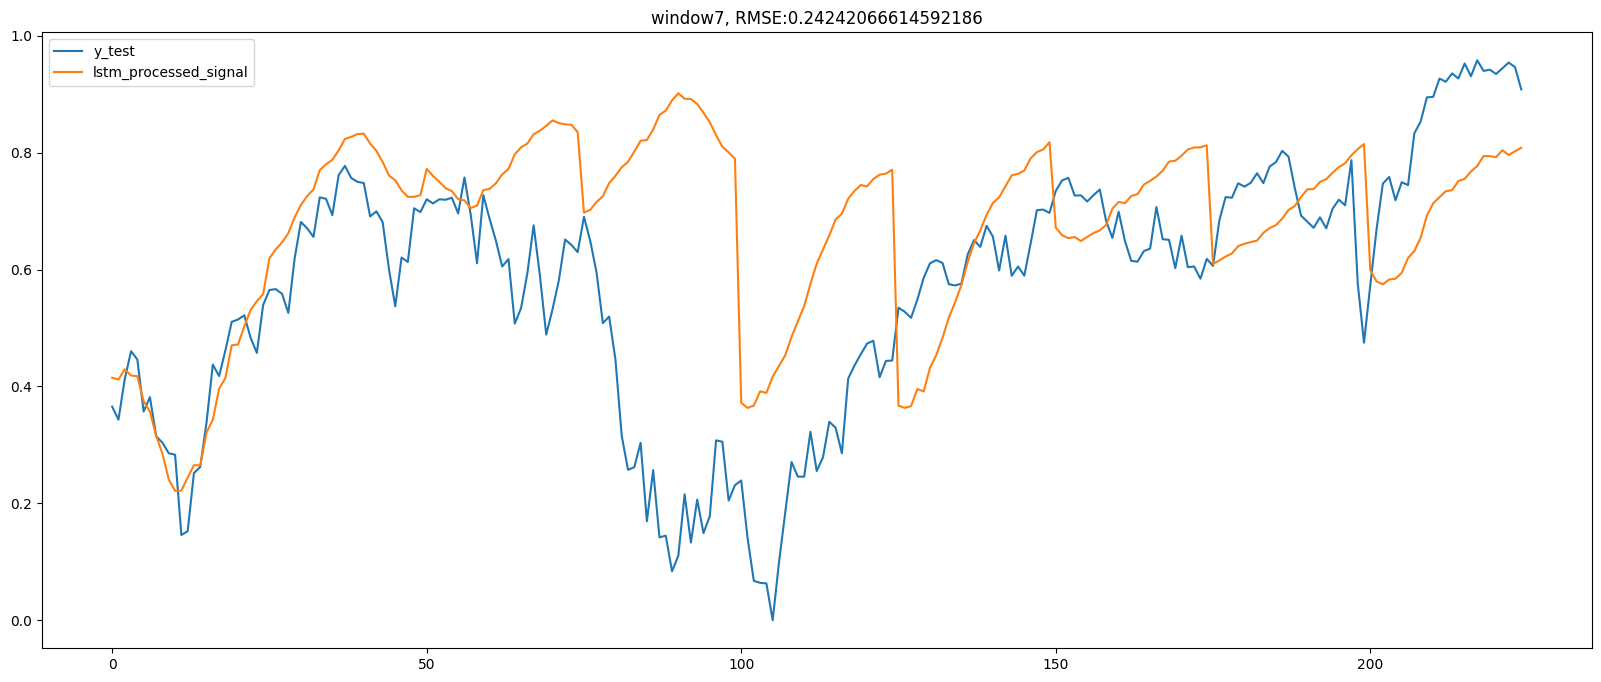

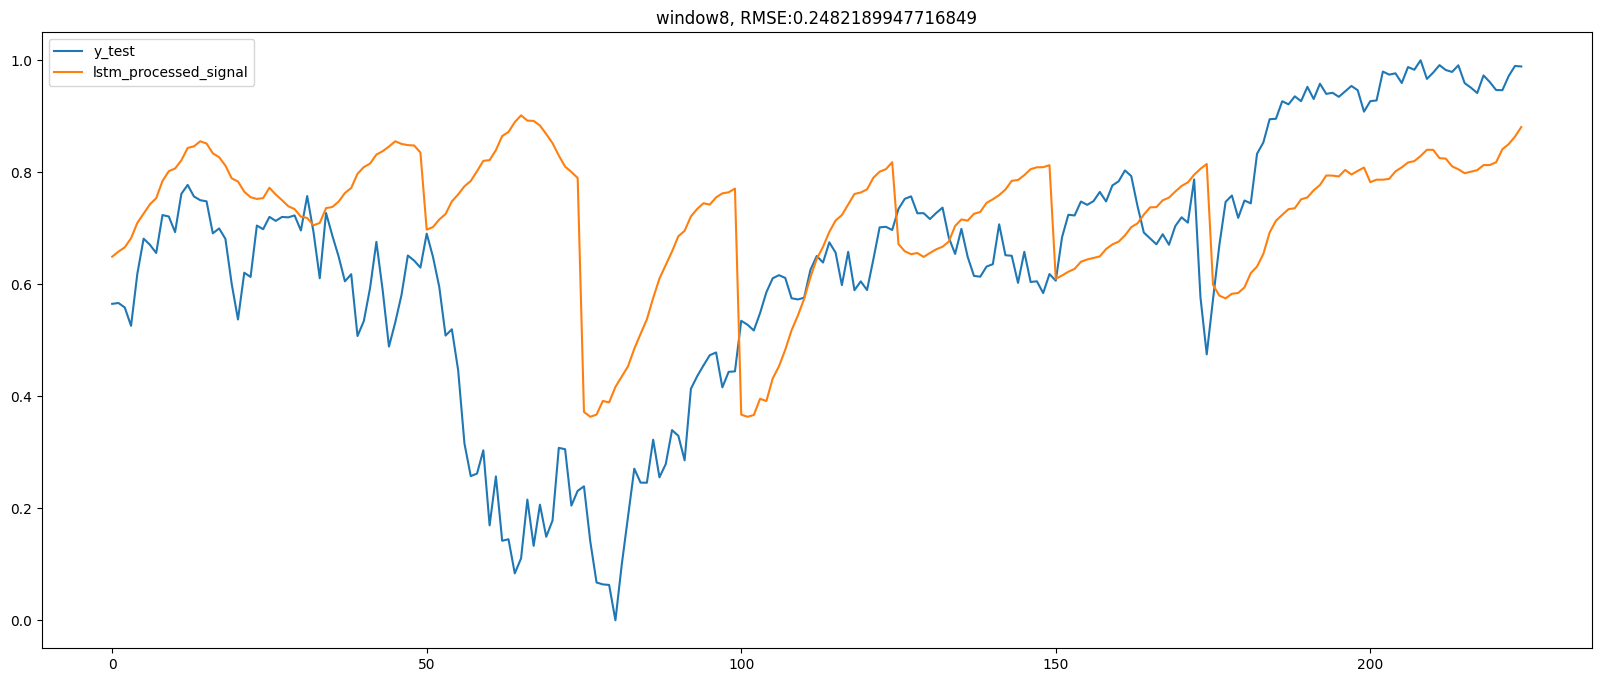

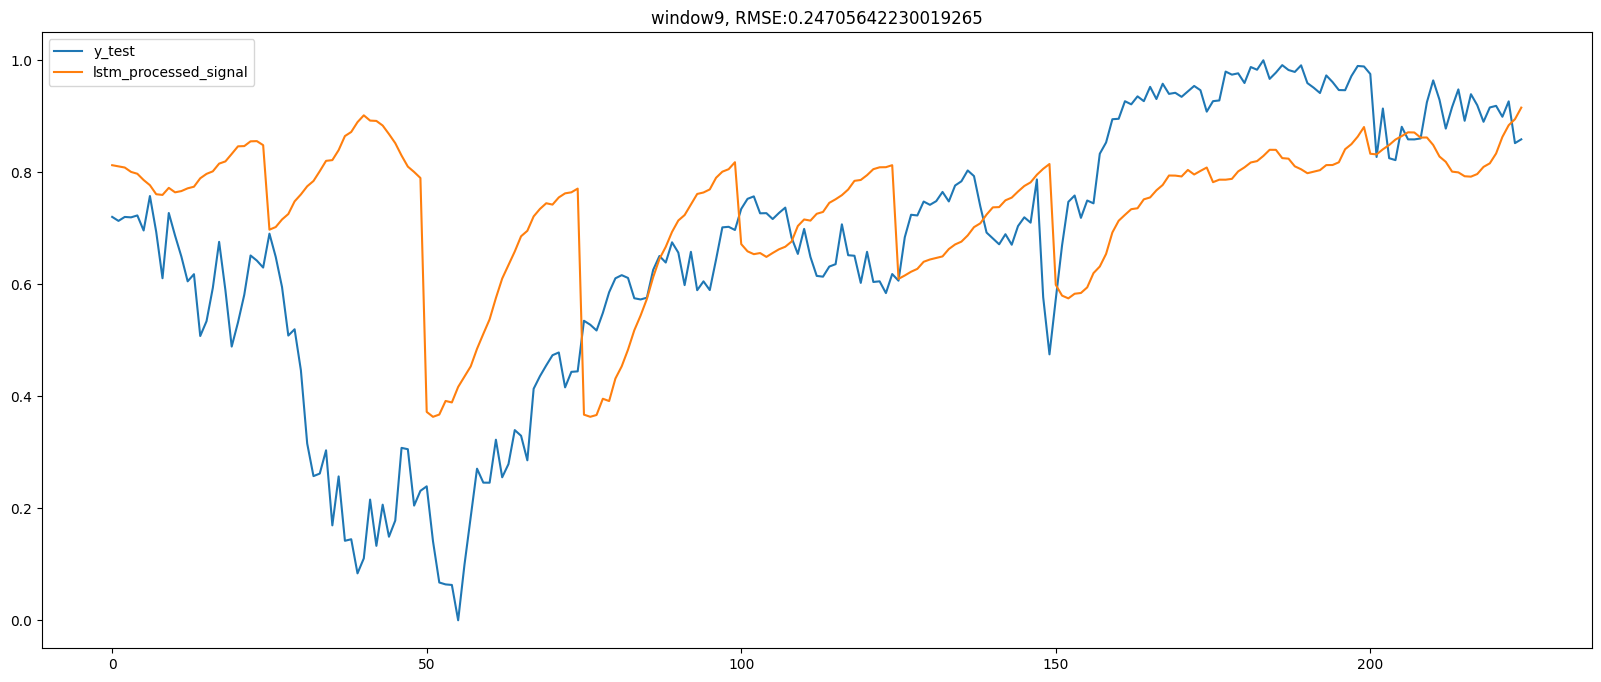

average_rmse=0.19148679711926458


In [25]:
rmse_list = list()
for window in range(test_data.shape[0]):
    RMSE = compute_rmse(lstm_processed_signal[window].flatten(), y_test[window].flatten())
    rmse_list.append(RMSE)
    plt.figure(figsize=(20, 8))
    plt.title(f'window{window}, RMSE:{RMSE}')
    plt.plot(y_test[window].flatten(), label='y_test')
    plt.plot(lstm_processed_signal[window].flatten(), label='lstm_processed_signal')
    plt.legend()
    plt.show()
average_rmse = sum(rmse_list) / len(rmse_list)
print(f'average_rmse={average_rmse}')